In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter

# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer, SimpleImputer



In [113]:
df=pd.read_csv(r"C:\Users\cigde\OneDrive\Desktop\survey_1.csv")

df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27/08/2014 15:24,19,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,0-26,...,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN
1,27/08/2014 15:05,32,Male,United States,OH,No,No,Yes,Often,0-26,...,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
2,02/10/2014 21:25,72,Female,United States,IN,No,Yes,Yes,Never,500-1000,...,Somewhat easy,Maybe,Maybe,Some of them,Yes,No,No,Don't know,Yes,NaN
3,27/08/2014 19:17,65,Male,United States,FL,Yes,No,No,NaN,0-26,...,Very easy,Maybe,No,Some of them,No,No,No,Yes,No,NaN
4,27/08/2014 17:12,62,M,United States,CA,No,No,No,Never,More than 1000,...,Don't know,Maybe,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,28/08/2014 10:07,17,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,NaN
1255,28/08/2014 10:35,15,Male,United States,OH,No,No,No,NaN,100-500,...,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...
1256,30/08/2014 20:55,11,p,United States,AL,Yes,Yes,Yes,Often,0-26,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered
1257,29/08/2014 17:26,11,male,United States,OH,Yes,No,No,Never,0-26,...,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN


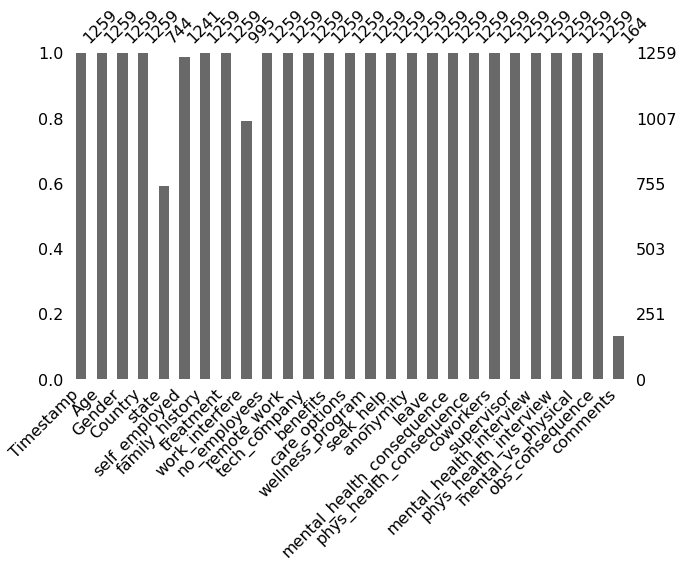

In [114]:
import missingno as msno
msno.bar(df, figsize=(10,6));

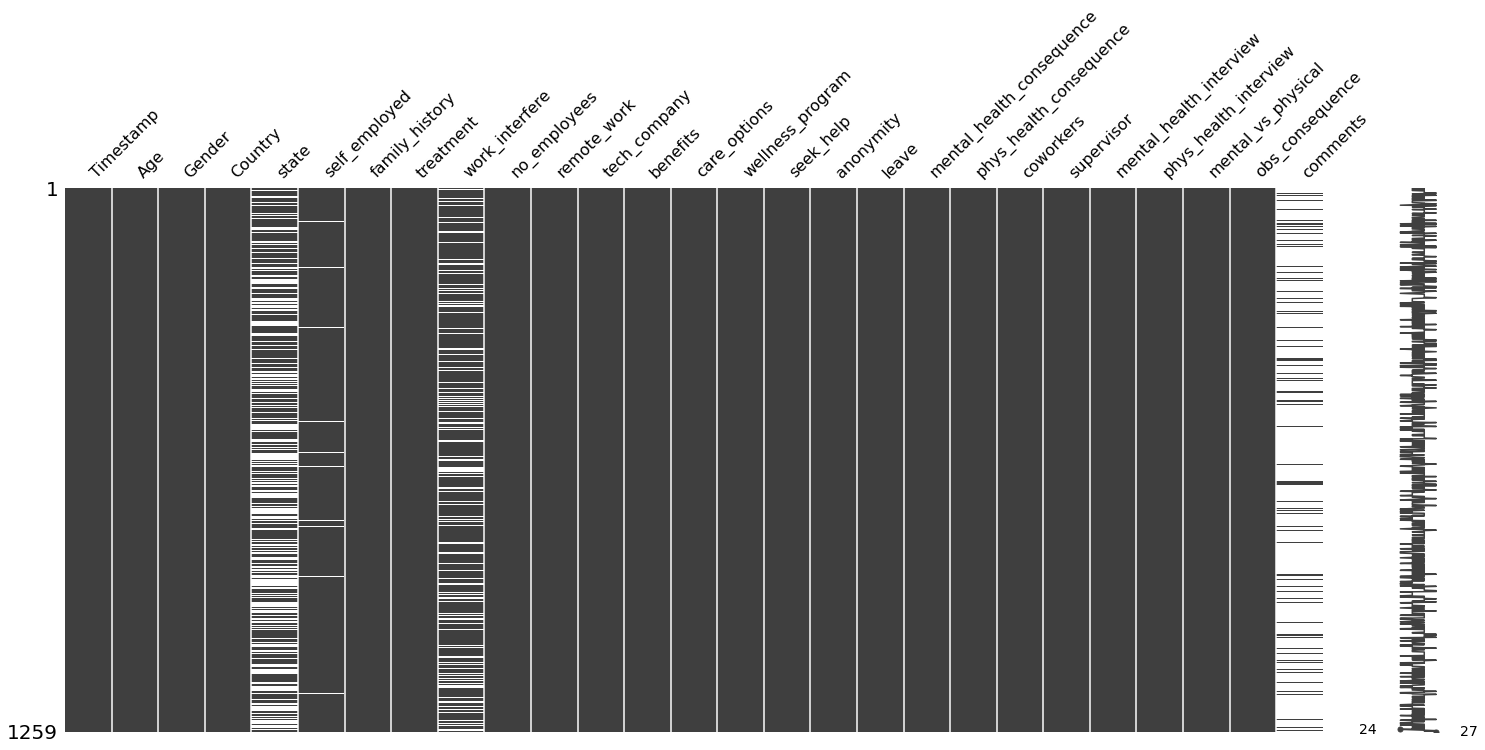

In [115]:
import missingno as msno
msno.matrix(df);

In [116]:
columns=list(df.columns)

columns_used=[]


for ch in columns:
  if df[ch].count()> 900:
    columns_used.append(ch)

df=df[columns_used]


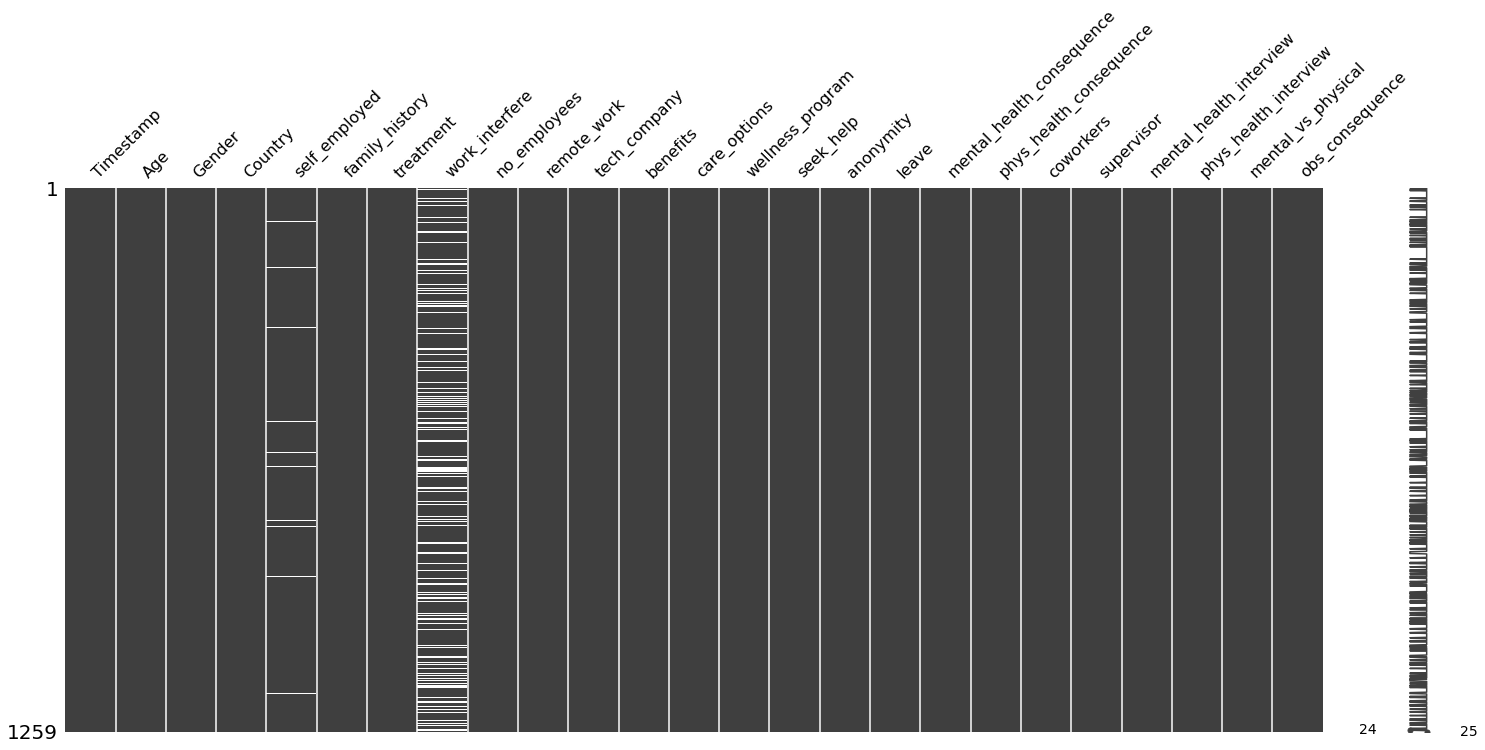

In [117]:
import missingno as msno
msno.matrix(df);

C:\Users\cigde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='self_employed', ylabel='count'>

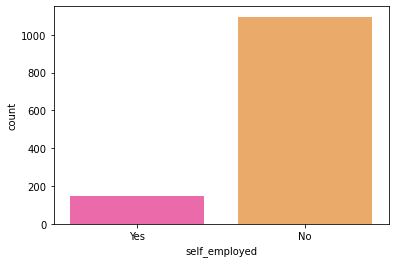

In [118]:
sns.countplot(df['self_employed'],label="Count",palette="spring")


In [119]:
df['self_employed'].mode()

0    No
dtype: object

In [120]:
df['self_employed'] = df['self_employed'].fillna('No')

<ipython-input-120-b41bb0db9952>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['self_employed'] = df['self_employed'].fillna('No')


In [121]:
df['Gender'] = df['Gender'].str.lower()

df['Gender'].unique()

<ipython-input-121-fba5e8056e5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].str.lower()


array(['all', 'male', 'female', 'm', 'male ', 'female (cis)', 'f',
       'female (trans)', 'msle', 'cis male', 'make', 'male (cis)',
       'genderqueer', 'guy (-ish) ^_^', 'female ', 'woman', 'femake',
       'malr', 'maile', 'male leaning androgynous', 'neuter', 'mal',
       'enby', 'cis-female/femme', 'fluid', 'queer/she/they', 'mail',
       'nah', 'androgyne', 'cis female', 'femail', 'male-ish', 'man',
       'queer', 'non-binary', 'cis man',
       'ostensibly male, unsure what that really means', 'trans-female',
       'agender', 'trans woman', 'something kinda male?', 'p',
       'a little about you'], dtype=object)

In [122]:
list_of_male=['male','m','M','maile','Malr','malr','Mail','mal','Make','Man','msle','something kinda male?','Mal','Cis Male',
              'Male (CIS)','Cis Man','cis male','Male ','ostensibly male, unsure what that really means','cis man','man','cis female',
             'mail','make','male ']

list_of_women=['female','femake','Woman','F','Female','f','Femake','female ','woman','cis-female/femme','femail','Female (cis)','Cis Female','female (cis)']


list_of_trans=['agender','all','male leaning androgynous','Neuter','Trans woman','Female (trans)','fluid','enby','Androgyne','queer',
              'queer/she/they','a little about you','p','All','Nah','Trans-female','Guy (-ish) ^_^','non-binary','genderqueer',
               'Male-ish','Trans-female','male-ish','male (cis)','neuter','trans woman','guy (-ish) ^_^','androgyne','female (trans)','nah','trans-female']


for ch in df['Gender'].unique():  
    if ch in list_of_male:
      df['Gender'].replace(ch,'Male', inplace=True)
    if ch in list_of_women:
      df['Gender'].replace(ch,'Female', inplace=True)
    if ch in list_of_trans:
      df['Gender'].replace(ch,'Trans', inplace=True)
        
    
df['Gender'].unique()   

C:\Users\cigde\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


array(['Trans', 'Male', 'Female'], dtype=object)

After editing the blank values and data, I decided to draw a few histograms and examine them.

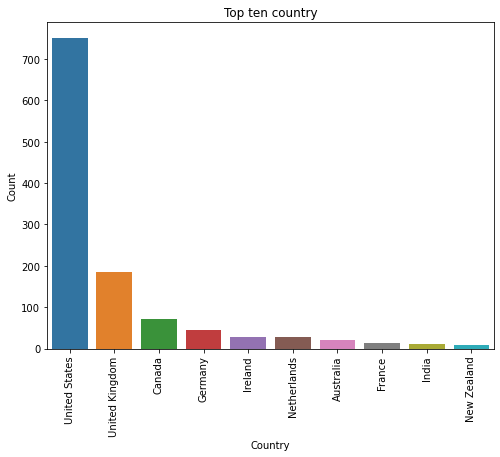

In [123]:
country_count = Counter(df['Country'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top ten country')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Majority of the population is working in United States.

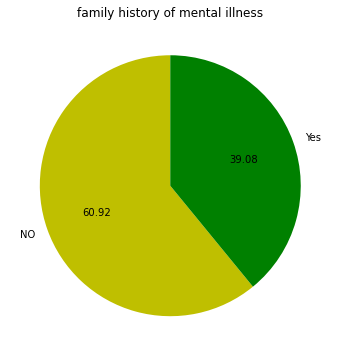

In [124]:
plt.figure(figsize = (10,6))
v = df['family_history'].value_counts()
plt.pie(v, autopct = '%0.02f', colors = ['y', 'g'], startangle = 90, labels= ['NO', 'Yes'])
plt.title('family history of mental illness')
plt.show()

Here approx 40% have family history of mental illness.

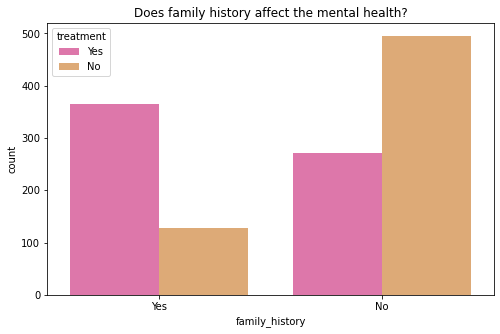

In [125]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df,x = 'family_history',hue= 'treatment',palette="spring",ax=ax, saturation=0.6, capsize=0.2)
plt.title('Does family history affect the mental health?')
plt.show()

More person go for the treatment if they have family history of mental illness.Thet may be aware of the importance of these health problems

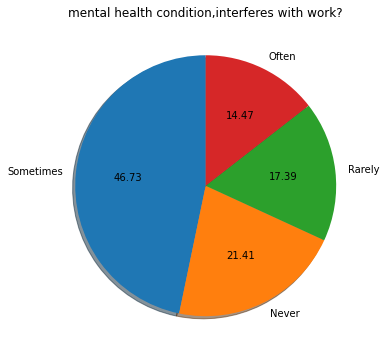

In [126]:
plt.figure(figsize = (10,6))
v = df['work_interfere'].value_counts()
label = ['Sometimes', 'Never', 'Rarely', 'Often']
plt.pie(v, labels = label, autopct = '%0.02f', radius = 1,shadow= True, startangle = 90)
plt.title('mental health condition,interferes with work?')
plt.show()

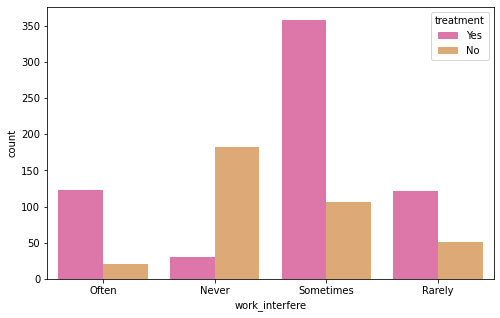

In [127]:

fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df,x = 'work_interfere',hue= 'treatment',palette="spring",ax=ax, saturation=0.6, capsize=0.2)
plt.show()

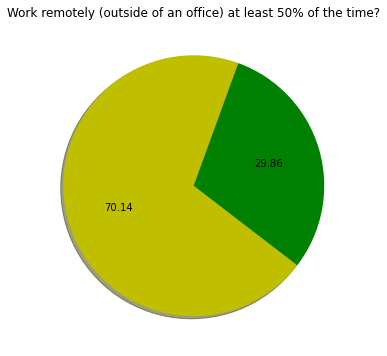

In [128]:
plt.figure(figsize = (10,6))
value = df['remote_work'].value_counts()
plt.pie(value, colors = ['y','g'], autopct=  '%0.02f', startangle = 70,shadow = True, radius = 1)
plt.title('Work remotely (outside of an office) at least 50% of the time?')
plt.show()

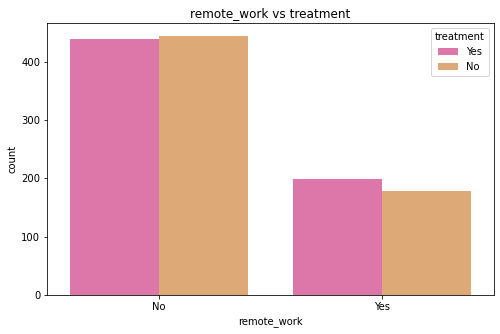

In [129]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df,x = 'remote_work',hue= 'treatment',palette="spring",ax=ax, saturation=0.6, capsize=0.2)
plt.title('remote_work vs treatment')
plt.show()

I realize that even if it is small, people working from home receive more treatment.


If I made a dynamic graph, I would prefer it to be a graph where I can delete the columns associated with the treatment.

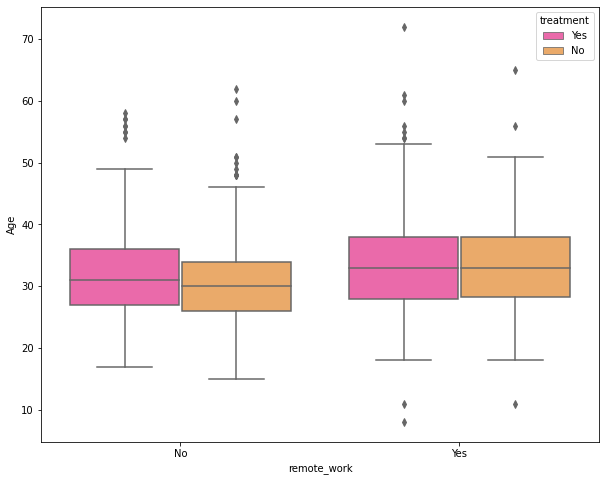

In [130]:
fig,ax = plt.subplots(figsize=(10,8))
ax = sns.boxplot(x="remote_work", y="Age", data=df,hue= 'treatment',palette="spring")



And it is not depend on age. Lets look at the gender and treatment..

In [131]:
df.Gender.unique()

array(['Trans', 'Male', 'Female'], dtype=object)

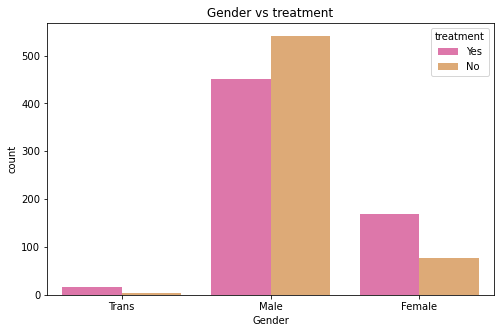

In [132]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df,x = 'Gender',hue= 'treatment',palette="spring",ax=ax, saturation=0.6, capsize=0.2)
plt.title('Gender vs treatment')
plt.show()


Most of the respondents are male, this happening only because the tech industry is occupied by a big majority by men. But female more tend to have treatment.

In [142]:
df['Age_Group'] = pd.cut(df['Age'],
                         [0,18,25,35,45,99],
                         labels=['<18','18-24','25-34','35-44','45+'])

<ipython-input-142-e2d9983e66ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Group'] = pd.cut(df['Age'],


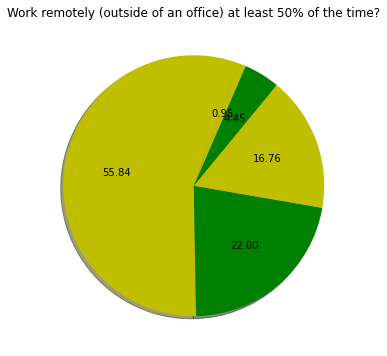

In [138]:
plt.figure(figsize = (10,6))
value = df['Age_Group'].value_counts()
plt.pie(value, colors = ['y','g'], autopct=  '%0.02f', startangle = 70,shadow = True, radius = 1)
plt.title('Work remotely (outside of an office) at least 50% of the time?')
plt.show()

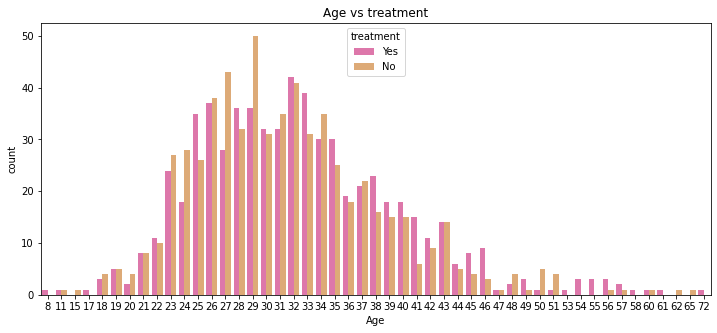

In [134]:
fig,ax = plt.subplots(figsize=(12,5))
sns.countplot(data=df,x = 'Age',hue= 'treatment',palette="spring",ax=ax, saturation=0.6, capsize=0.2)
plt.title('Age vs treatment')
plt.show()


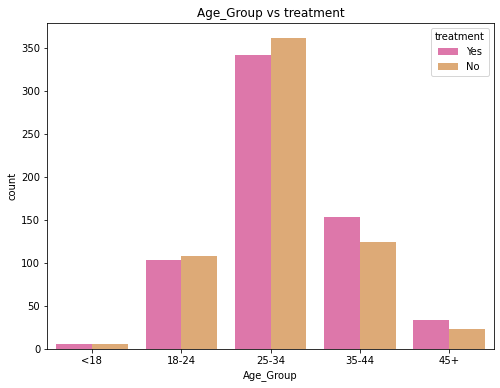

In [135]:

fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=df,x = 'Age_Group',hue= 'treatment',palette="spring",ax=ax, saturation=0.6, capsize=0.2)
plt.title('Age_Group vs treatment')
plt.show()


First thing that we can notice is that most participant's are man between 20 and 35 years old.  45+ and and middle age group tend to have treatment.

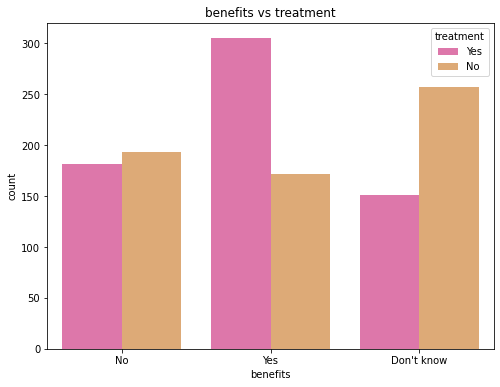

In [145]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=df,x = 'benefits',hue= 'treatment',palette="spring",ax=ax, saturation=0.6, capsize=0.2)
plt.title('benefits vs treatment')
plt.show()


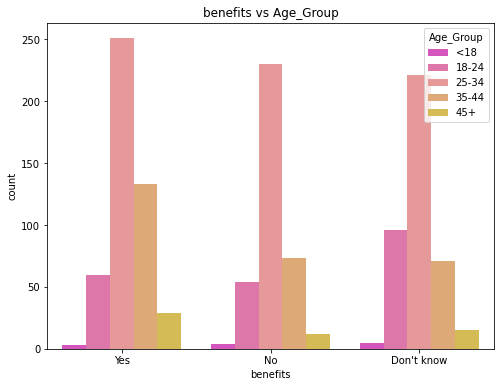

In [91]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=df,x = 'benefits',hue= 'Age_Group',palette="spring",ax=ax, saturation=0.6, capsize=0.2)
plt.title('benefits vs Age_Group')
plt.show()

The younger people (18-24) doesn't pay attention to those kind of things and they don't know that this kind of help exist.

Text(0.5, 1.0, 'no_employees vs Age_Group')

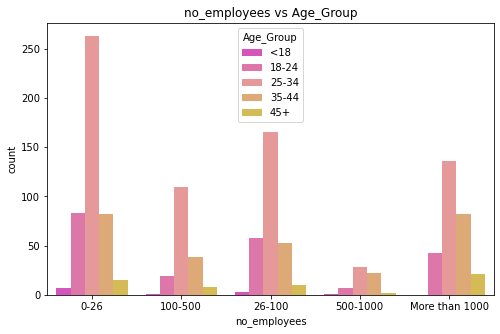

In [92]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df,x = 'no_employees',hue= 'Age_Group',palette="spring",ax=ax, saturation=0.6, capsize=0.2)
plt.title('no_employees vs Age_Group')

we can see that older people tend to work in bigger companies

Plots above shows that there is stronger support for mental health issues in bigger companies and that older people usually work in bigger companies. Thanks to that information we can confirm that strong relationship between age and this person company having some kind of mental health resources results (at least partially) from the fact that type of company differs with age.

Text(0.5, 1.0, 'self_employed vs treatment')

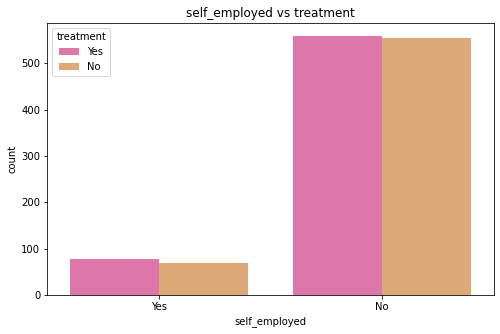

In [93]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df,x = 'self_employed',hue= 'treatment',palette="spring",ax=ax, saturation=0.6, capsize=0.2)
plt.title('self_employed vs treatment')

After the histograms, I decided to check which columns has a relationship with the treatment by using Chi-square test.

In [94]:
features=['treatment','Gender', 'Country', 'self_employed', 'family_history', 'mental_vs_physical', 'no_employees', 'remote_work', 'tech_company', 
          'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 
          'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 
          'obs_consequence']


list_of_relation=[]
list_of_not_relation=[]


for ch in features:
 cross_tab=pd.crosstab(index=df.treatment, columns=df[ch]).values
    
 chi2,p,ddof,expected = stats.chi2_contingency(cross_tab, correction=False)
 msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}"


 if p<=0.05:
  list_of_relation.append(ch)
 else:
  list_of_not_relation.append(ch)

In [95]:
df.treatment.unique()

array(['Yes', 'No'], dtype=object)

In [96]:
x1 = df[df['treatment'] == 'Yes']['Age']
x2 = df[df['treatment'] == 'No']['Age']

F, p = stats.f_oneway(x1, x2)
print('ANOVA test for mean Sales and Experience :')
if p <= 0.05: 
    print('p-value:', p, '(At least one mean value is significantly different!)')
else: 
    print('p-value:', p, '(No significant differences among the means...)')

ANOVA test for mean Sales and Experience :
p-value: 0.3232709868338912 (No significant differences among the means...)


We cant reject Null Hypothesis the frequency of mental health illness and attitudes towards mental health vary by age.They move together.

In [97]:
print('Treatment has a relationship with columns : ')
print('')
print(list_of_relation)

Treatment has a relationship with columns : 

['treatment', 'Gender', 'Country', 'family_history', 'mental_vs_physical', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'coworkers', 'mental_health_interview', 'obs_consequence']


 After Chi square test, I will check the effect size of relationship , Using Cramers V test , We can see how strongly two categorical fields are associated.

In [98]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

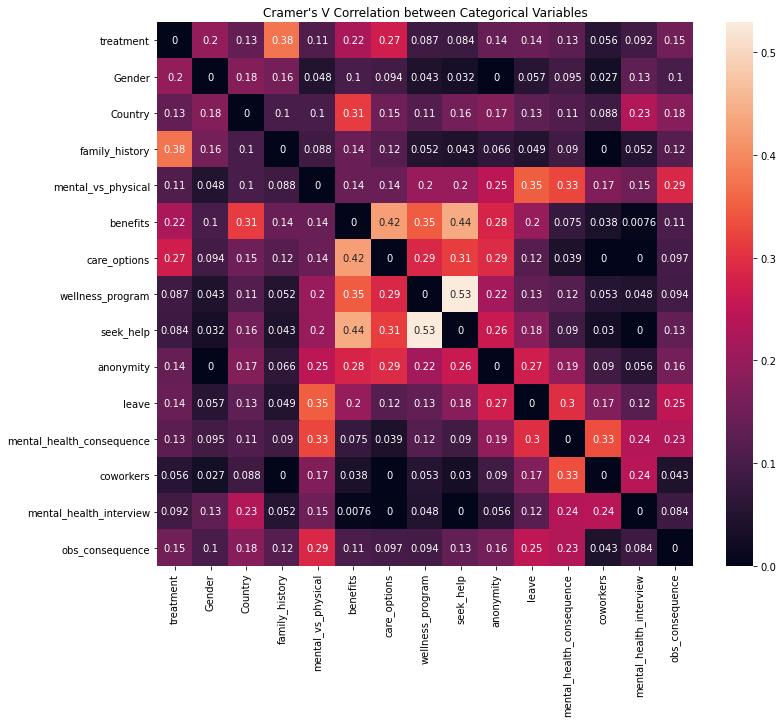

In [99]:
import itertools

corrM = np.zeros((len(list_of_relation),len(list_of_relation)))

for col1, col2 in itertools.combinations(list_of_relation, 2):
    idx1, idx2 = df[list_of_relation].columns.get_loc(col1), df[list_of_relation].columns.get_loc(col2)
    corrM[idx1, idx2] = cramers_v(df[list_of_relation][col1], df[list_of_relation][col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=list_of_relation, columns=list_of_relation)
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer\'s V Correlation between Categorical Variables");

When I looked at the correlation matrix, I noticed that the 'Treatment' column is most often associated with the column 'family history', 'benefits','gender','Leave','ananymty' and 'care_options'.

Result: We reject Null Hypothesis #1 the frequency of mental health illness and attitudes towards mental health vary by workıng from home .They do not move together.

In [34]:
df.Country.unique()

array(['Zimbabwe', 'United States', 'South Africa', 'United Kingdom',
       'New Zealand', 'Singapore', 'France', 'Japan', 'Australia',
       'Ireland', 'Canada', 'Germany', 'Croatia', 'Mexico', 'Netherlands',
       'Thailand', 'China', 'Switzerland', 'Greece', 'Portugal',
       'Costa Rica', 'Italy', 'Poland', 'Finland', 'Denmark', 'Austria',
       'Sweden', 'Bulgaria', 'Norway', 'Czech Republic', 'Belgium',
       'India', 'Brazil', 'Philippines', 'Spain', 'Latvia', 'Romania',
       'Russia', 'Colombia', 'Israel', 'Hungary', 'Uruguay', 'Moldova',
       'Bosnia and Herzegovina', 'Nigeria', 'Georgia', 'Slovenia',
       'Bahamas, The'], dtype=object)

In [100]:
europe=['Bulgaria', 'France','Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia','Germany',  'Italy','Latvia','Croatia','Denmark','Ireland',
        'Slovenia','Greece','Ireland','Austria','Sweden','Romania', 'Belgium','Spain', 'Finland','Bosnia and Herzegovina', 'Hungary', 'Norway','Czech Republic','Moldova']

w_s_m_america=['United States', 'Canada','Bahamas, The','Mexico', 'Brazil','Costa Rica','Colombia','Uruguay']

britania=['United Kingdom']
        
asia=['Philippines','Israel','India','Japan','Singapore','Thailand','Georgia','China','Russia']

avurstralia=[ 'New Zealand']

africa=['South Africa','Zimbabwe','Nigeria']



for ch in df['Country'].unique():  
 if ch in europe:
    df['Country'].replace(ch,'europe', inplace=True)
 if ch in w_s_m_america:
    df['Country'].replace(ch,'w_s_m_america', inplace=True)
 if ch in britania:
    df['Country'].replace(ch,'britania', inplace=True)
 if ch in asia:
    df['Country'].replace(ch,'asia', inplace=True)
 if ch in avurstralia:
    df['Country'].replace(ch,'avurstralia', inplace=True)
 if ch in africa:
    df['Country'].replace(ch,'africa', inplace=True)
        
    
df['Country'].unique()   
        

C:\Users\cigde\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


array(['w_s_m_america', 'britania', 'europe', 'asia', 'africa',
       'avurstralia'], dtype=object)

Text(0.5, 1.0, 'Region vs benefits')

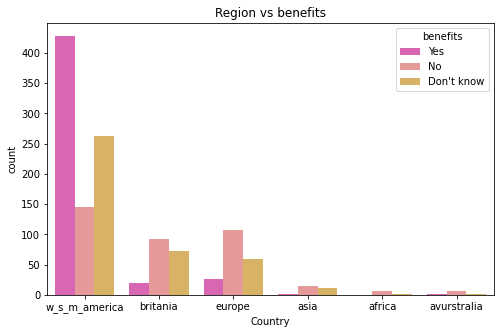

In [101]:

fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df,x = 'Country',hue= 'benefits',palette="spring",ax=ax, saturation=0.6, capsize=0.2)
plt.title('Region vs benefits')

Text(0.5, 1.0, 'treatment vs seek_help')

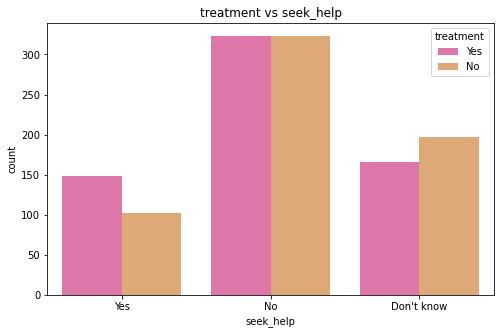

In [102]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df,x = 'seek_help',hue= 'treatment',palette="spring",ax=ax, saturation=0.6, capsize=0.2)
plt.title('treatment vs seek_help')

mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

leave=How easy is it for you to take medical leave for a mental health condition?

iş arkadaslarının saglıgını onemsedgını dusundugu ortamda bıreyler tedavı gormek ıcın daha cok ayrılmayı dusunuyorlar

Text(0.5, 1.0, 'treatment vs mental_health_consequence')

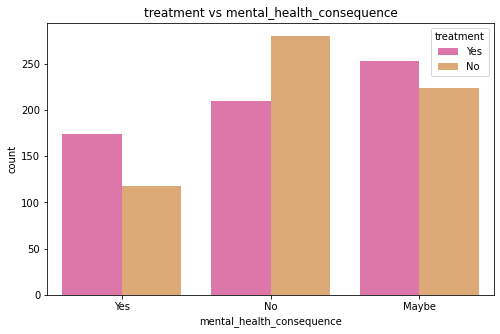

In [110]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df,x = 'mental_health_consequence',hue= 'treatment',palette="spring",ax=ax, saturation=0.6, capsize=0.2)
plt.title('treatment vs mental_health_consequence')

Text(0.5, 1.0, 'treatment vs coworkers')

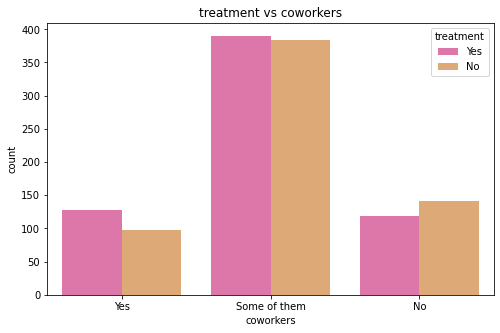

In [109]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df,x = 'coworkers',hue= 'treatment',palette="spring",ax=ax, saturation=0.6, capsize=0.2)
plt.title('treatment vs coworkers')

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

Text(0.5, 1.0, 'treatment vs mental_health_consequence')

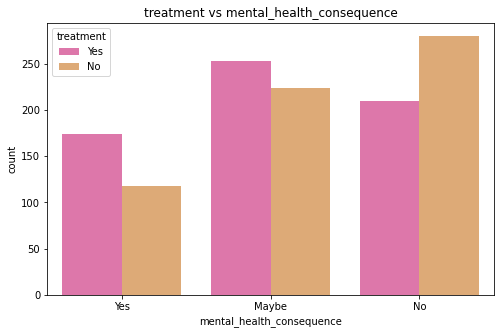

In [39]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df,x = 'mental_health_consequence',hue= 'treatment',palette="spring",ax=ax, saturation=0.6, capsize=0.2)
plt.title('treatment vs mental_health_consequence')

Text(0.5, 1.0, 'treatment vs obs_consequence')

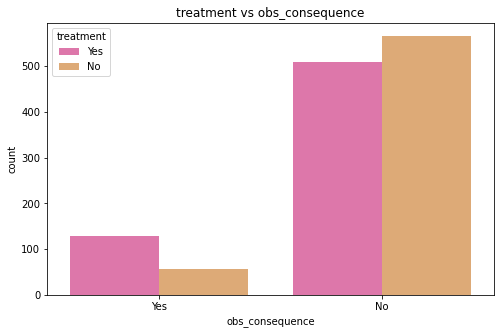

In [111]:


fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df,x = 'obs_consequence',hue= 'treatment',palette="spring",ax=ax, saturation=0.6, capsize=0.2)
plt.title('treatment vs obs_consequence')

Text(0.5, 1.0, 'treatment vs anonymity')

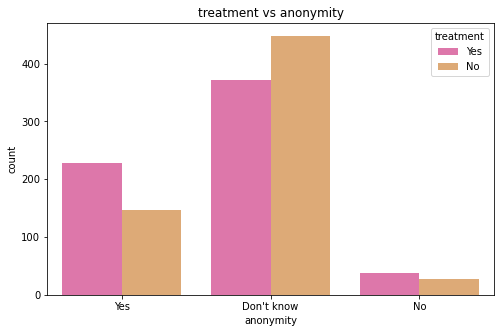

In [103]:
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df,x = 'anonymity',hue= 'treatment',palette="spring",ax=ax, saturation=0.6, capsize=0.2)
plt.title('treatment vs anonymity')

RESULT:

When they think that their friends will approach the thought of getting treatment, they are more inclined to explain.
As a result, if the person finds a suitable environment in and around his / her family to be treated, he becomes a cure.
Getting treatment is unlikely to work remotely or in an office setting
